# Team Assignment #4 - Data Exploration

Analysis completed by **Team Trackstars (Stuart Bladon and Jason Mooberry).**

## Overview 

In this notebook we perform exploratory data anlysis (EDA) on the [Welltory heart rate variability (HRV) COVID-19 data](https://github.com/Welltory/hrv-covid19/tree/master). 

Guide to interpreting in the context of the TA4 assignment: 
1. **Document data context and data sampling in markdown**: All data inspected is accompanied by markdown comments to make clear the context of the analysis. We use HTML visual cues and plots to help make the EDA approachable and clear.
2. **Explore and interpret data structure, descriptive statistics, data quality, and variable relationships**: We apply descriptive statistics throughout, for **all** tables in the dataset to ensure we have a holistic understanding of the dataset. Distributions, variable correlations, clustering and some dimensionality reduction is provided where they enhance understanding and offer insights
3. **Explore data visually with appropriate visualizations**: Plots of descriptive statistics and categorical filters on various tables are provided throughout
4. **Discuss and implement strategies for Handling Missing Values, Removing Duplicates, and Handling Outliers**: Each of the tables in this dataset has its own challenges. We elected to provide in-context commentary on these challenges as we were interpreting and vetting the data. 
5. **Perform data transformation as appropriate**: We predominantly employ Pandas Dataframes, Series and Numpy arrays for manipulating data here. Common operations include row filtering, column transofrmation, column decomposition, decoding attributes in a table, converting categoricals to numeric representations and normalizing in support of mathematical operations (notably clustering and dimensionality reduction). 
6. **Create at least one new feature and document your approach**: We apply the body-mass index (BMI) formula to simplify the participant analysis in the *Particpant* data section below
7. **Perform a dimensionality reduction method on the data and discuss**: We cluster and apply principle component analysis (PCA) during the inspection and exploration of the heart-rate variabiliy (HRV) table.
8. **Include a discussion around data quality assessment, including data profiling, data completeness, data accuracy, data consistency, data integrity, and data lineage and provenance**: As with the strategies for missing values and outliers, we elected to interleave commentary on the data quality as the issue arose during the analysis. Each table analysis (denoted by the associated markdown table heading) asks questions and gives treatment to the issues germane to the associated table.

## Usage

This notebook is designed to be run on an Internet-connected Jupyter instance. The cells can be run top to bottom and should produce no errors. After cloning and importing the dataset, we conduct analysis on each of the individual data tables to draw conclusions about its utility, consistency, and data quality. 

Dependencies are called out by import statements, but notably include the following beyond the standard library: 
- numpy
- pandas
- matplotlib
- seaborn
- IPython
- sklearn

# Load Dataset

Clone the Welltory (HRV) COVID-19 into a local repository, iterate over the files and load them into respective dataframes. 

In [580]:
import pandas as pd 
import matplotlib as mpl 
import seaborn as sns

In [581]:
import os

In [582]:
!git clone https://github.com/Welltory/hrv-covid19.git

fatal: destination path 'hrv-covid19' already exists and is not an empty directory.


In [583]:
!ls hrv-covid19/

CONSENT      LICENSE      README.md    data         datatypes.md


In [584]:
!ls hrv-covid19/data

blood_pressure.csv     participants.csv       surveys.csv
heart_rate.csv         scales_description.csv wearables.csv
hrv_measurements.csv   sleep.csv              weather.csv


In [585]:
hrv_data_dir = "hrv-covid19/data" 

dataset = []
files = os.listdir(path=hrv_data_dir)
for file in files: 
    dataset.append({ "name": file.split('.')[0],  "file": file, "path": hrv_data_dir + '/' + file })

In [586]:
dfs = {}
for d in dataset: 

    # Avoid hidden files that might be lurking... 
    if not d['file'][0] == '.': 
        print(f"Loading {d['name']} ({d['file']}) into [{d['name']}] dataframe ") 
        dfs[d['name']] = pd.read_csv(d['path'])

Loading scales_description (scales_description.csv) into [scales_description] dataframe 
Loading participants (participants.csv) into [participants] dataframe 
Loading wearables (wearables.csv) into [wearables] dataframe 
Loading blood_pressure (blood_pressure.csv) into [blood_pressure] dataframe 
Loading surveys (surveys.csv) into [surveys] dataframe 
Loading heart_rate (heart_rate.csv) into [heart_rate] dataframe 
Loading weather (weather.csv) into [weather] dataframe 
Loading hrv_measurements (hrv_measurements.csv) into [hrv_measurements] dataframe 
Loading sleep (sleep.csv) into [sleep] dataframe 


❗️**Insights**: 

- The included `datatypes.md` file is probably going to contain some helpful information, don't forget to inspect it

# Dataset Structure and Semantics

Here we should: 
* Document data context and data sampling in markdown
* Explore and interpret data structure, descriptive statistics, data quality, and variable relationships
* Explore data visually with appropriate visualizations

In [587]:
from IPython.display import display, HTML

def comment(message, color='lightblue'): 
    """
    Utility function to ensure a message stands out. 
    """
    # HTML rendering with help from https://stackoverflow.com/questions/68347513/jupyter-and-python-passing-css-colors-to-a-div-tag-from-a-dictionary
    display(HTML(f"<div style='background-color:{color}'>" + message + "</div>"))

## Overall Structure and Composition

See what the included datatypes file has to say about the dataset... 

In [588]:
!cat hrv-covid19/datatypes.md

**Technical description of provided csv files**

**data/participants.csv**

Contains general information about users (participants)

|     |            |                            |           |
|-----|------------|----------------------------|-----------|
|     | **Column** | **Description**            | **Units** |
| 0   | user\_code | Unique user ID             |           |
| 1   | gender     | Gender: m/f/other or empty |           |
| 2   | age\_range | Age range                  |           |
| 3   | city       | City                       |           |
| 4   | country    | Country                    |           |
| 5   | height     | Height                     | cm        |
| 6   | weight     | Weight                     | kg        |
| 7   | symptoms_onset | The onset date of the symptoms of the disease. The format is MM/DD/YYYY. |    |

**data/hrv_measurements.csv**

Contains data based on heart rate variability (HRV) measurements collected from COVID-19 participants via the 

This is essential understanding the dataset, but we can't rely exclusively on the documentation, as the metadata could be outdated or inaccurate. 

Dump the schema of each table to gain an appreciation for their actual features and overall structure. 

Note the explicit calls to the notebook `display` functionality required since the notebook can't infer its use in a loop. [Source](https://stackoverflow.com/questions/26873127/show-dataframe-as-table-in-ipython-notebook)

In [589]:
for name, df in dfs.items():
    print(name) 
    display(df.head(1))

scales_description


,Scale,Description,Value,Meaning
0,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,1,Less than 3 days


participants


,user_code,gender,age_range,city,country,height,weight,symptoms_onset
0,007b8190cf,m,25-34,Mandalay,Myanmar,170.18,96.162,NaN


wearables


,user_code,day,resting_pulse,pulse_average,pulse_min,pulse_max,average_spo2_value,body_temperature_avg,stand_hours_total,steps_count,distance,steps_speed,total_number_of_flights_climbed,active_calories_burned,basal_calories_burned,total_calories_burned,average_headphone_exposure,average_environment_exposure
0,007b8190cf,2020-04-26,NaN,70.0,70.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2859.0,2859.0,NaN,NaN


blood_pressure


,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
0,01bad5a519,2020-04-29 22:33:33,100,150,NaN,NaN,NaN,NaN


surveys


,user_code,scale,created_at,value,text
0,01bad5a519,S_CORONA,2020-04-23,2,Symptoms are characteristic of coronavirus


heart_rate


,user_code,datetime,heart_rate,is_resting
0,007b8190cf,2020-04-26 04:49:25,70,0


weather


,user_code,day,avg_temperature_C,atmospheric_pressure,precip_intensity,humidity,clouds
0,013f6d3e5b,2020-05-22,18.0667,1017.6,0.0002,70.0,67.0


hrv_measurements


,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,...,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep,tags,rr_data
0,007b8190cf,10489a6aea,2020-04-21 21:23:08,morning,75,795.9,0.12,45.802,54.174,15.15,...,508.0,1076.0,267.0,0.472,1851.0,0,-1,NaN,COVID-19; Workout; Sex; Hobby; Studying; Sleep...,"819,1008,831,847,785,778,866,839,801,793,846,8..."


sleep


,user_code,day,sleep_begin,sleep_end,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
0,0d297d2410,2019-12-31,2019-12-31 07:50:32,2019-12-31 08:45:22,3290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Scales

Investigate the scales table. 

In [590]:
df_scale = dfs['scales_description']

In [591]:
df_scale.dtypes

Scale          object
Description    object
Value           int64
Meaning        object
dtype: object

In [592]:
df_scale['Scale'].unique()

array(['S_COVID_SYMPTOMS', 'S_COVID_COUGH', 'S_COVID_FEVER',
       'S_COVID_BREATH', 'S_COVID_FATIGUE', 'S_COVID_PAIN',
       'S_COVID_CONFUSION', 'S_COVID_TROUBLE', 'S_COVID_BLUISH',
       'S_COVID_OVERALL', 'S_CORONA', 'S_HEART', 'S_HEART_1', 'S_HEART_2',
       'S_HEART_22', 'S_HEART_3', 'S_HEART_4', 'S_HEART_5', 'S_HEART_6',
       'S_HEART_7', 'S_HRA_MONTH\n\xa0', 'S_HRA_ASTHMA', 'S_HRA_ALLERG',
       'S_HRA_LUNG', 'S_HRA_KIDNEY', 'S_HRA_LIVER', 'S_HRA_CHOL',
       'S_HRA_DBT', 'S_HRA_ARR', 'S_HRA_HEART', 'S_HRA_AFTER',
       'S_HRA_HBP', 'S_HRA_LBP', 'S_HRA_THYR', 'S_HRA_EPILEPSY',
       'S_HRA_BONE', 'S_HRA_JOINTS', 'S_HRA_OSTEO', 'S_HRA_NECK',
       'S_HRA_JOINT', 'S_HRA_FIBRO', 'S_HRA_HEAD', 'S_HRA_SLEEP',
       'S_HRA_DEP', 'S_HRA_ANX', 'S_HRA_PANIC', 'S_HRA_EDEMA',
       'S_HRA_CUSHING', 'S_HRA_D', 'S_HRA_OVARY', 'S_HRA_VARI',
       'S_HRA_ENDO', 'S_HRA_HORM', 'S_SMOKING', 'S_HRA_PMS',
       'S_HRA_HEAVY', 'S_HRA_IRR', 'S_HRA_PERPAIN', 'S_HRA_SUGAR',
       'S_HR

Decompose the scales into their top 2 hierarchical categories... 

In [593]:
def get_subcat1(s): 
    t = s.split('_')
    return t[1] if len(t) >= 2 else None

def get_subcat2(s): 
    t = s.split('_')
    return t[2] if len(t) >= 3 else None
    
df_scale['Subcat1'] = df_scale['Scale'].apply(get_subcat1) 
df_scale['Subcat2'] = df_scale['Scale'].apply(get_subcat2) 

In [594]:
df_scale['Subcat1'].unique()

array(['COVID', 'CORONA', 'HEART', 'HRA', 'SMOKING', 'DIABETES', 'DIAB'],
      dtype=object)

In [595]:
df_scale.head()

,Scale,Description,Value,Meaning,Subcat1,Subcat2
0,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,1,Less than 3 days,COVID,SYMPTOMS
1,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,2,3 to 6 days,COVID,SYMPTOMS
2,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,3,7 to 14 days,COVID,SYMPTOMS
3,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,4,More than 14 days,COVID,SYMPTOMS
4,S_COVID_COUGH,Symptom intensity: Coughing,1,User isn’t experiencing symptom,COVID,COUGH


In [596]:
df_scale[df_scale['Subcat1'] == 'DIAB' ]

,Scale,Description,Value,Meaning,Subcat1,Subcat2
142,S_DIAB_REASON1,Whether the user’s waist circumference is with...,1,Waist circumference is within the norm,DIAB,REASON1
143,S_DIAB_REASON2,Whether the user is active enough,1,Is active enough,DIAB,REASON2
144,S_DIAB_REASON3,Whether the user eats healthy,1,Eats healthy,DIAB,REASON3
145,S_DIAB_REASON4,Whether the user has BP problems,1,No BP problems,DIAB,REASON4
146,S_DIAB_REASON5,Whether the user’s blood sugar is within the n...,1,Blood sugar is within the norm when taking the...,DIAB,REASON5
147,S_DIAB_REASON6,Whether the user has a family history of diabetes,1,No family history of diabetes,DIAB,REASON6


❗️**Insights**: 

- The scales table appears to be an aggregation of all the enumerative or categorical types found across the dataset.
- This table allows mapping between the categoricals and their plain-language description, the associated integer value and a concise meaning string.
- There is a shallow hierarchy in these types, which we've broken out here into subcategory 1 and subcategory 2.
- The top-level division of the data classifications are: 'COVID', 'CORONA', 'HEART', 'HRA', 'SMOKING', 'DIABETES', 'DIAB'.
- Many of the measurement scales are boolean values, though some have a range of severity.
- The `DIAB` sub-category appears redundant but on closer inspection contains supplemental information on patients with diabetes
- Further analysis on this table is of limited value, as it just contains mappings to decode other readings in the dataset

## Participants Table

Investigate the study participants table. 

In [597]:
def table_overview(df): 
    """
    Utility function to produce some high-level insights into the provided dataframe
    """
    rows = len(df)
    
    print(f"First 5 rows of the dataframe:")
    display(df.head(5))
    
    print(f"Numerical column statistics:")
    display(df.describe())
    nan_rows = rows - len(df.dropna())
    pct_nan = nan_rows/rows*100
    comment(f"<b>Found {rows} rows, of which {nan_rows} ({pct_nan:.1f}%) contain invalid data.<b>", 'lightblue' if pct_nan < 5 else 'orange')

    # Check the integrity of the rows if needed
    if pct_nan > 1: 
        counts = df.count()
        for i, column in enumerate(df.columns): 
            pct_valid = counts.iloc[i]/rows*100
            color = "coral"
            
            if pct_valid > 95: 
                color = "lightblue"
            elif pct_valid > 80: 
                color = "lightgreen" 
            elif pct_valid > 50: 
                color = "orange"    
            
            comment(f"&nbsp&nbsp<b> - {column}</b> has {counts.iloc[i]} ({pct_valid:.1f}%) valid values", color)

    # Report on any duplicated rows
    duplicates = len(df[df.duplicated()])
    if duplicates: 
        display(f"{duplicates} duplicated rows detected!", color='orange') 

In [598]:
df_p = dfs['participants']

In [599]:
table_overview(df_p)

First 5 rows of the dataframe:


,user_code,gender,age_range,city,country,height,weight,symptoms_onset
0,007b8190cf,m,25-34,Mandalay,Myanmar,170.18,96.162,NaN
1,013f6d3e5b,f,18-24,São Paulo,Brazil,174.00,77.300,5/15/2020
2,01bad5a519,m,45-54,St Petersburg,Russia,178.00,92.000,4/5/2020
3,0210b20eea,f,25-34,Sochi,Russia,169.00,60.000,5/6/2020
4,024719e7da,f,45-54,St Petersburg,Russia,158.00,68.500,5/27/2020


Numerical column statistics:


,height,weight
count,183.000000,185.000000
mean,169.976393,77.927757
std,12.400103,19.552541
min,132.080000,43.500000
25%,163.500000,63.500000
50%,168.000000,74.344000
75%,174.500000,90.537000
max,250.000000,154.221000


Convert the date to a proper datetime

In [600]:
df_p['symptoms_onset'] = pd.to_datetime(df_p['symptoms_onset'])

Look at the symptom onset by time reported

<Axes: >

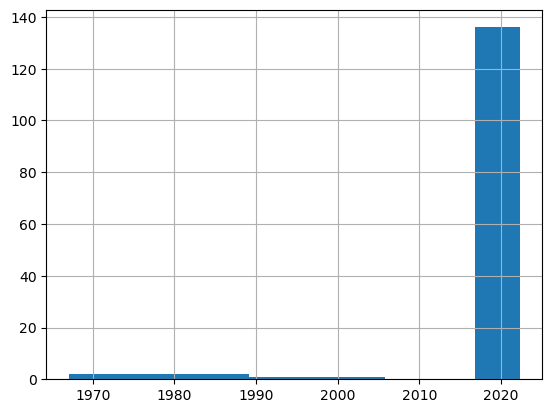

In [601]:
df_p['symptoms_onset'].hist()

Omit data that occurs outside of the plausible COVID-19 pandemic infection window

In [602]:
import datetime
df_p = df_p[df_p['symptoms_onset'] > datetime.datetime(2019, 1, 1)]

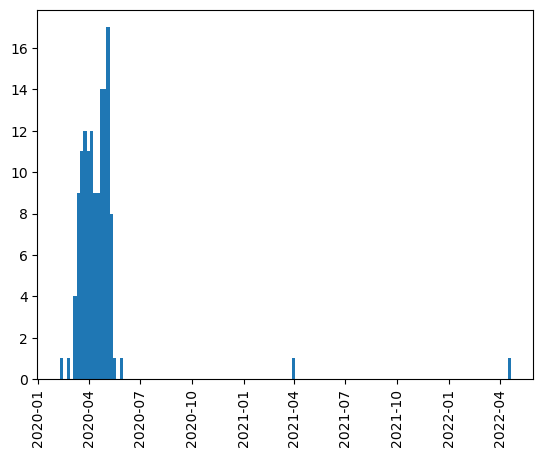

In [603]:
_ = mpl.pyplot.hist(df_p['symptoms_onset'], bins=len(df_p), orientation='vertical')
_ = mpl.pyplot.xticks(rotation=90, )

We see that the preponderance of this data is reported in Q1/Q2 of 2020. Next look at the height/weight distributions here. 

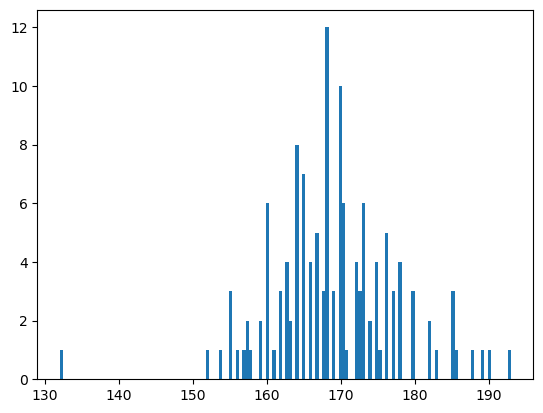

In [604]:
_ = mpl.pyplot.hist(df_p['height'],bins=len(df_p))

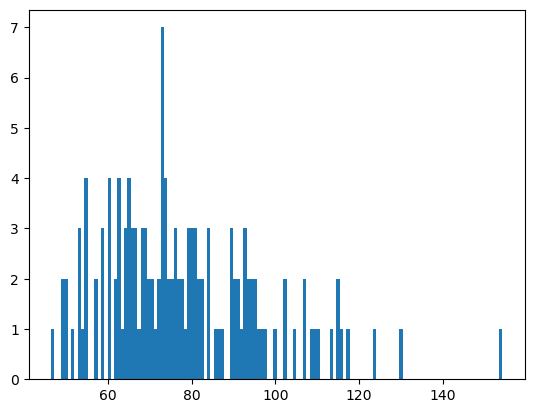

In [605]:
_ = mpl.pyplot.hist(df_p['weight'], bins=len(df_p))

Look at the distribution of data grouped by various categoricals, omitting any rows with missing information. 

In [606]:
def box_plot_groups(groups, column, width=10): 
    """
    Helper function to take a pandas group iterator (returned from df.groupby) and 
    render an arbitrary number of boxplot subplots, given the column to extract for 
    each boxplot
    """
    bar_fig, bar_ax = mpl.pyplot.subplots()
    bar_fig.set_figwidth(width)
    bar_fig.suptitle(f"{column} samples, by group")
    
    box_fig, box_ax = mpl.pyplot.subplots()
    box_fig.set_figwidth(width)
    box_fig.suptitle(f"{column} distribution, by group") 
    
    xlabels = [None] * len(groups)
    position = 0 
    
    for name, group in groups: 
        bar_ax.bar(height=len(group), x=name)
        
        # Referenced MPL docs here to implement boxplot: https://matplotlib.org/stable/plot_types/stats/boxplot_plot.html#sphx-glr-plot-types-stats-boxplot-plot-py
        box_ax.boxplot(group[column], positions=[position])    
        
        xlabels[position] = name
        position = position + 1
    
    # With help from https://stackabuse.com/rotate-axis-labels-in-matplotlib/: 
    _ = box_ax.set_xticklabels(xlabels, rotation=90)
    
    # Avoids complaint from MPL about setting tick labels without fixed ticks, see https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator
    _ = bar_ax.set_xticks(xlabels)
    _ = bar_ax.set_xticklabels(xlabels, rotation=90)

In [607]:
df_p = df_p.dropna(subset=['height', 'weight'])

Compute an indicator of overall fitness, body mass index (BMI) to give us another view on the distribution of the participants

In [608]:
def compute_bmi(h, w): 
    #cm -> m 
    h = h/100 
    return w/h**2

# With cue from https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe
df_p['bmi'] = df_p.apply(lambda x: compute_bmi(x.height, x.weight), axis=1) 

In [609]:
country_groups = df_p.groupby(by='country')

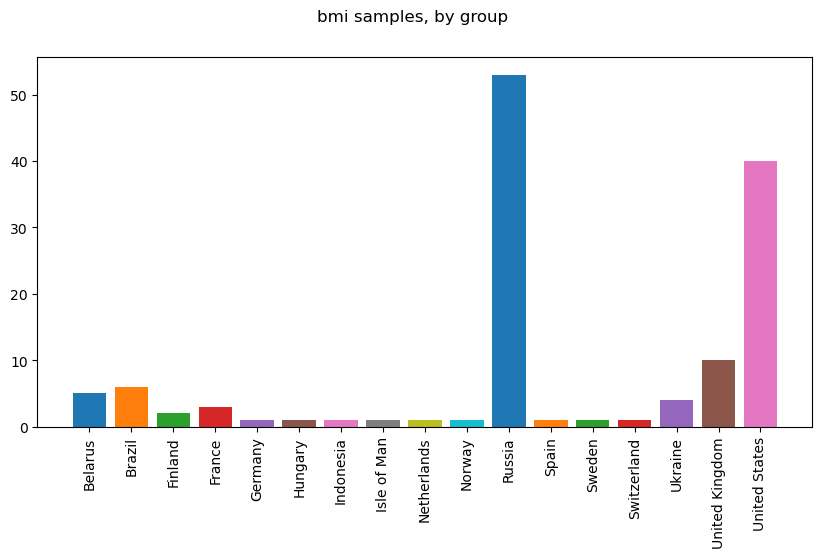

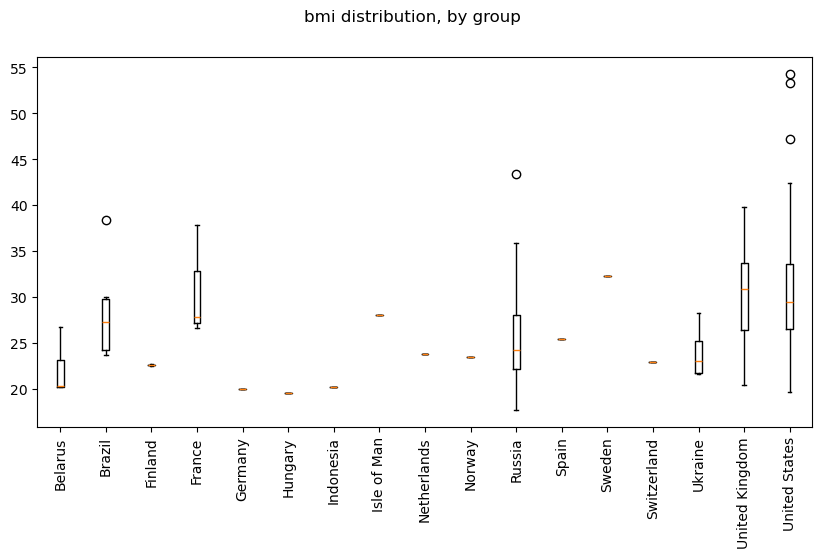

In [610]:
box_plot_groups(country_groups, 'bmi')

Without doing an actual comparison to global population distributions, it's evident that we have a skewed sample here. Tiny populations from most countries, with outsize representation from US and particularly Russia. 

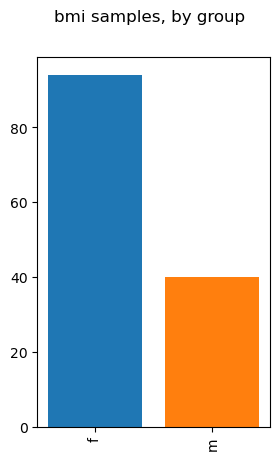

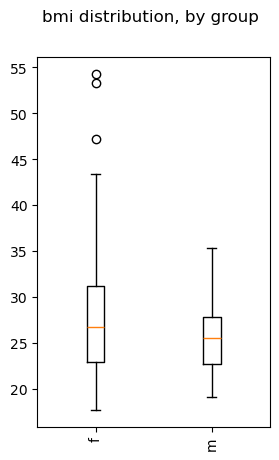

In [611]:
gender_groups = df_p.groupby(by='gender')
box_plot_groups(gender_groups, 'bmi', width = 3)

A clear imbalance of female participants here. 

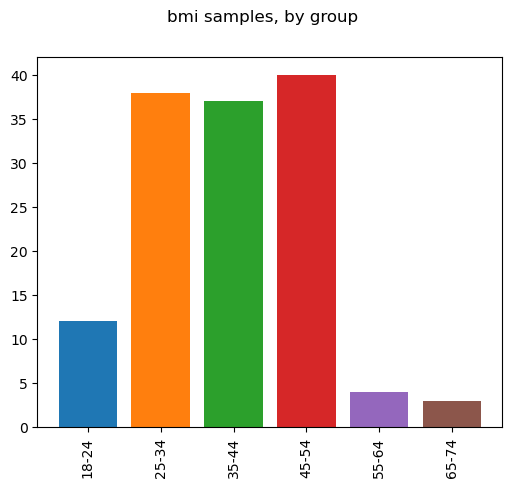

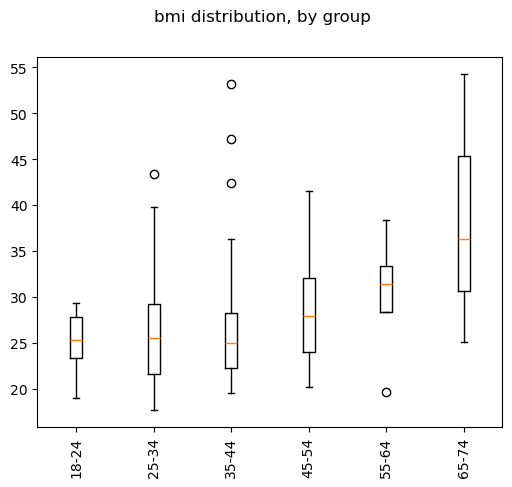

In [612]:
age_groups = df_p.groupby(by='age_range')
box_plot_groups(age_groups, 'bmi',width=6) 

The participants are not representative of the global age distrution, notably there's an absence of children and underrepresentation of young and old adults. Compare with the below distribution provided by an Internet source that suggests the true global population distribution in 2020: 

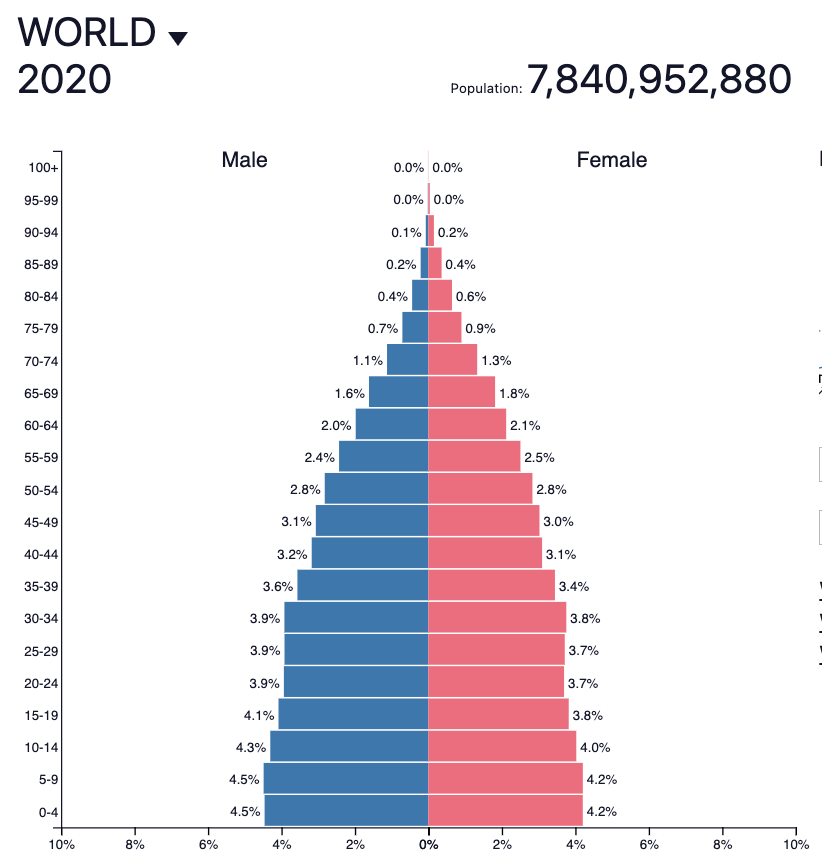
[Source](https://www.populationpyramid.net/world/2020/)

❗️**Insights**: 

- There are 185 participants in this study each with their own unique hexadecimal user code
- The numerical data available here is limited to height and weight, reported in centimeters and kilograms respectively
- The time series plot reveals there are erroneous and missing dates for symptom onset, which must be dealt with prior to downstream analysis
- In total, ~3/4 of the rows in this table are missing data, which introduces a number of questions: 
    - Do we treat the asscociated row as an invalid record for all downstream analysis? the interdependence of these tables adds significant complexity here. Illustrative example: a participant with an invalid initial symptom date. If we drop this participant, we need to clean all records for that participant from every table in the dataset. That's not terribly difficult, but is it the right thing to do?
    - Do we selectively treat this record as invalid based on the type of informational statistics we're trying to present? running with our example, we could surmise the symptoms reported are all valid (despite the invalid date), and just omit that individual from any analysis that is temporally anchored. 
    - Do we interpolate the missing values. Again, with our example we would infer that the participants symptoms would have been reported alongside the vast majority of all others circa Q1/Q2 of 2020 and use e.g. the mean reporting date of other submissions as the date for this participant, annotating the interpolation accordingly
    - Do we perhaps create a new category to bin these outliers so the data is still analyzed? In our running example of the bad symptom onset time, we could create a "unknown symptom onset" category that allows use of the datapoints, but with adequate dislaimer
    - Each of the actions enumerated above has consequences that would need to be explained to the party that is ultimately on the receiving end of this analysis (customers, colleagues, future readers of any publications) 
- Presumably the data was collected opportunistically, but there are significant biases in the data that do not reflect the global distrbution of location, height, weight, or gender
- The range of reported symptom onset dates is confusing. A few data points exist years beyond the initial global infection event. This could imply less attention was paid to tracking, self reporting, or aggregating the data after mid-2020. It could also be erroneous given how far these samples lie outside the core distribution. 

## Wearables Table

In [613]:
df_wbl = dfs['wearables']

In [614]:
table_overview(df_wbl)

First 5 rows of the dataframe:


,user_code,day,resting_pulse,pulse_average,pulse_min,pulse_max,average_spo2_value,body_temperature_avg,stand_hours_total,steps_count,distance,steps_speed,total_number_of_flights_climbed,active_calories_burned,basal_calories_burned,total_calories_burned,average_headphone_exposure,average_environment_exposure
0,007b8190cf,2020-04-26,NaN,70.0,70.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2859.0,2859.0,NaN,NaN
1,01bad5a519,2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8574.0,NaN,57.90,NaN,NaN,2624.0,2624.0,NaN,NaN
2,01bad5a519,2020-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7462.0,NaN,59.10,NaN,NaN,2624.0,2624.0,NaN,NaN
3,01bad5a519,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507.0,NaN,60.97,NaN,NaN,2624.0,2624.0,NaN,NaN
4,01bad5a519,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10131.0,NaN,49.10,NaN,NaN,2624.0,2624.0,NaN,NaN


Numerical column statistics:


,resting_pulse,pulse_average,pulse_min,pulse_max,average_spo2_value,body_temperature_avg,stand_hours_total,steps_count,distance,steps_speed,total_number_of_flights_climbed,active_calories_burned,basal_calories_burned,total_calories_burned,average_headphone_exposure,average_environment_exposure
count,1515.000000,2089.000000,2089.000000,2089.000000,40.00000,65.000000,531.000000,1968.000000,1869.000000,1418.000000,1235.000000,1200.000000,3097.000000,3097.00000,230.000000,149.000000
mean,61.409241,78.084251,63.078506,99.456199,0.96100,36.404615,8.986817,5342.067581,3494.690744,29.700409,16.202429,750.721667,2258.165644,2549.04908,64.027348,54.406040
std,12.775324,14.366994,14.334455,29.298930,0.02134,0.239394,5.030643,4761.774987,3599.635544,28.068371,20.799798,915.538000,341.462086,804.62248,14.525733,7.028195
min,40.000000,48.000000,10.000000,48.000000,0.92000,35.800000,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000,81.000000,81.00000,11.650000,31.560000
25%,52.000000,69.000000,53.000000,76.000000,0.94750,36.200000,4.000000,1456.000000,772.000000,10.400000,3.000000,66.000000,1968.000000,2001.00000,53.607500,52.020000
50%,58.000000,76.000000,60.000000,96.000000,0.96000,36.400000,10.000000,4477.500000,2687.000000,24.575000,9.000000,180.000000,2271.000000,2353.00000,64.395000,55.150000
75%,69.000000,85.000000,72.000000,118.000000,0.98000,36.600000,13.000000,7857.250000,5035.000000,44.097500,22.000000,1597.000000,2569.000000,2668.00000,75.215000,57.180000
max,109.000000,163.000000,122.000000,225.000000,0.99000,36.900000,19.000000,30882.000000,43914.000000,240.000000,164.000000,5423.000000,3395.000000,8418.00000,92.900000,73.160000


The wearables data appears pretty sparse! Deeper analysis on pulse oximetry (SpO2), body temperature, headphone exposure and environment exposure seem dubious given the relatively small percentages of data contained in the dataset. Alternatively, the calories burned has 100% reporting rate and would give us a significantly larger sample size for any follow-on analysis. Do a closer inspection of just pulse data and activity levels. 

In [615]:
df_wbl_highcount = df_wbl.drop(inplace=False, axis='columns', columns=[
    'average_spo2_value', 
    'body_temperature_avg', 
    'stand_hours_total',
    'resting_pulse', 
    'steps_speed',
    'total_number_of_flights_climbed',
    'active_calories_burned',
    'average_headphone_exposure',
    'average_environment_exposure',
])

In [616]:
df_wbl_highcount.dropna(inplace=True)

In [617]:
table_overview(df_wbl_highcount)

First 5 rows of the dataframe:


,user_code,day,pulse_average,pulse_min,pulse_max,steps_count,distance,basal_calories_burned,total_calories_burned
114,0d297d2410,2020-01-01,85.0,47.0,118.0,4153.0,3060.0,2569.0,2673.0
115,0d297d2410,2020-01-02,75.0,48.0,115.0,18523.0,12553.0,2569.0,3052.0
116,0d297d2410,2020-01-03,87.0,67.0,119.0,7466.0,5318.0,2569.0,2831.0
118,0d297d2410,2020-01-05,108.0,60.0,120.0,6114.0,4405.0,2569.0,2674.0
119,0d297d2410,2020-01-06,72.0,52.0,100.0,5346.0,3804.0,2569.0,2722.0


Numerical column statistics:


,pulse_average,pulse_min,pulse_max,steps_count,distance,basal_calories_burned,total_calories_burned
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,79.323607,61.309461,105.648983,5490.746242,3730.170645,2178.038904,2630.158267
std,14.909448,14.964669,27.365466,4570.273046,3545.276091,329.567574,935.458033
min,48.000000,29.000000,48.000000,1.000000,1.000000,1317.000000,1558.000000
25%,69.000000,51.000000,84.000000,1923.500000,1194.500000,1936.000000,1949.000000
50%,77.000000,57.000000,105.000000,4606.000000,3026.000000,2255.000000,2351.000000
75%,87.000000,69.000000,121.000000,8029.500000,5350.000000,2332.000000,2805.000000
max,163.000000,122.000000,197.000000,29987.000000,43914.000000,2995.000000,6655.000000


Have a look at which, if any, of the tracker's data are correlated at the macro level... 

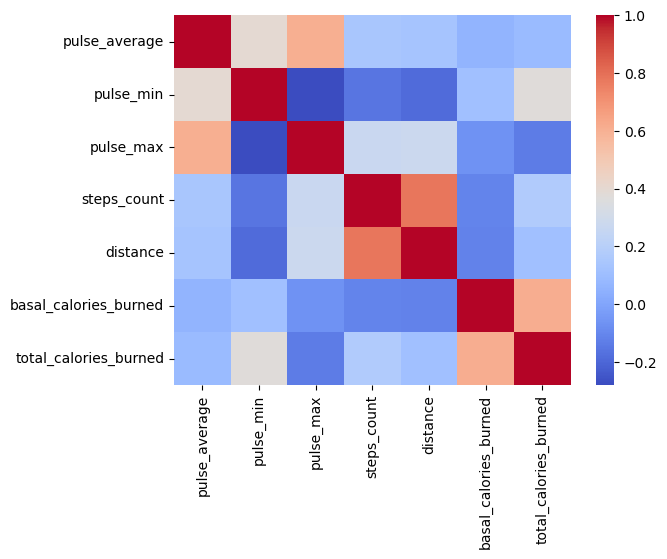

In [618]:
correlation_matrix = df_wbl_highcount.corr(method='pearson', numeric_only=True)

# SNS syntax to color correlation matrix with help from : https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)
_ = sns.heatmap(correlation_matrix, cmap='coolwarm')

Correlations, after we addressed the sparsity:

 - Strong correlation between steps and distance, good sanity check on the correlation analysis
 - Positive correlation between average pulse and max pulse, high pulse rate increases average - makes sense
 - Negative correlation between minimum pulse and max pulse, distance and steps - seems to imply active people have a lower resting or base pulse rate
 - Negative coreelation between max pulse and total calories, similar to previous 

<Axes: xlabel='distance', ylabel='steps_count'>

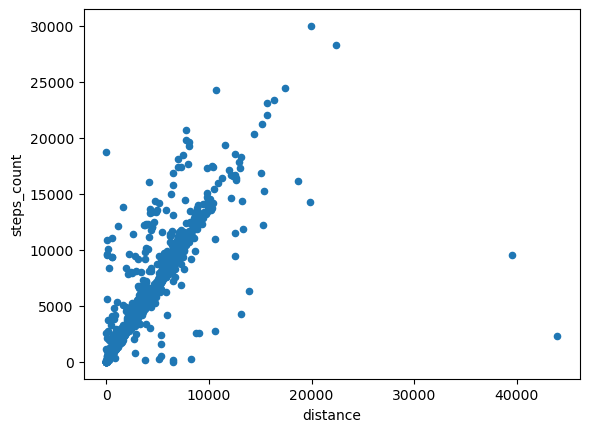

In [619]:
df_wbl_highcount.plot.scatter(x = 'distance', y = 'steps_count')

Here we can see evidence, via the outliers, of some points that would need to be addressed if we were to attempt to model this. The points on the right of the plot could be easily explained by someone jumping in a car while they were recording a workout, but regardless would not be capturing the intended measure, which is presumably a proxy for physical activity. Similarly the upper left points are questionable. A strategy would have to be arrived at to either reject these or monitor their frequency. 

<Axes: xlabel='pulse_max', ylabel='pulse_average'>

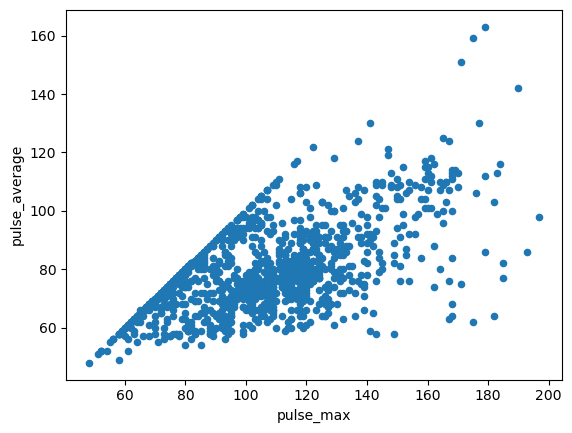

In [620]:
df_wbl_highcount.plot.scatter(x = 'pulse_max', y = 'pulse_average')

Here we see another comforting visualization, where it's clear the max pulse for an invididual can never fall below average, we should expect to see the inverse for min_pulse. 

<Axes: xlabel='pulse_min', ylabel='pulse_average'>

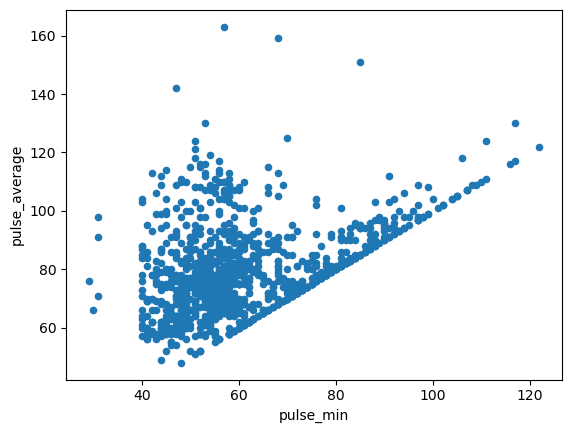

In [621]:
df_wbl_highcount.plot.scatter(x = 'pulse_min', y = 'pulse_average')

... and mercifully, we do.

❗️**Insights**: 

- This data is very sparse, a strategy for dealing with this (discussed in the previous section) must be adopted to perofrm follow on analysis, and that decision needs to be documented to pass on to consumers of the analyis
- Given the 100% reporting rate for day (date reported), calories burned, and the relatively high-rate of pulse data, we else to narrow the focus on this table to exclusively those columns, dropping all the high-sparsity columsn
- While some of the correlations are bordering on self-evident, their existence and possibly reliable distribution is a useful indicator of data quality, and can be used as a canary of sorts if a streaming analytic were built to monitor this information continuously.

## Blood Pressure Table

In [622]:
df_bp = dfs['blood_pressure']
table_overview(df_bp)

First 5 rows of the dataframe:


,user_code,measurement_datetime,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
0,01bad5a519,2020-04-29 22:33:33,100,150,NaN,NaN,NaN,NaN
1,01bad5a519,2020-04-30 01:33:33,100,150,NaN,NaN,NaN,NaN
2,01bad5a519,2020-04-30 09:16:38,95,140,3.38,4545.0,6.0,141.4
3,01bad5a519,2020-04-30 12:16:38,95,140,NaN,NaN,NaN,NaN
4,01bad5a519,2020-05-01 06:58:06,80,130,2.89,4000.0,NaN,104.0


Numerical column statistics:


,diastolic,systolic,functional_changes_index,circulatory_efficiency,kerdo_vegetation_index,robinson_index
count,721.000000,721.000000,299.000000,299.000000,283.000000,299.000000
mean,81.228849,119.441054,2.594013,2735.197057,-15.498233,84.663779
std,8.865761,10.522578,0.291302,747.882570,18.681233,14.399208
min,25.000000,63.000000,1.680000,1300.000000,-76.000000,49.500000
25%,76.000000,113.000000,2.440000,2250.500000,-29.000000,75.580000
50%,82.000000,120.000000,2.580000,2640.000000,-17.000000,83.220000
75%,88.000000,126.000000,2.730000,3076.500000,-5.000000,93.170000
max,101.000000,157.000000,3.510000,7875.000000,45.000000,164.850000


The integrity of this data is an improvement over the previous table. Here we have 40+% of values intact for all ty8pes, with some foundational numbers in the systolic/diastolic pressure, time of measurement being 100% intact.  

<Axes: >

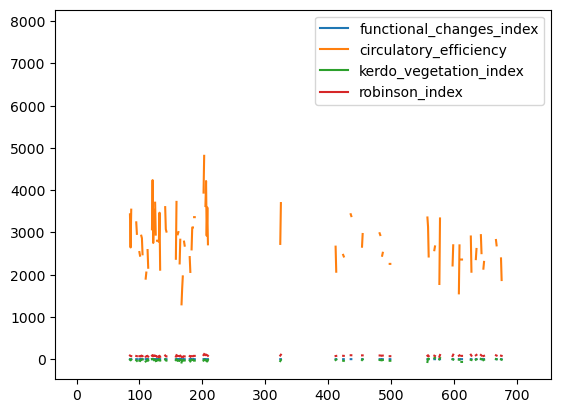

In [623]:
df_bp.plot(y=['functional_changes_index', 'circulatory_efficiency', 'kerdo_vegetation_index', 'robinson_index'])

A cursory inspection of the data reveals that the lower percentage values are either all absent, or all present for any given row. The chart above helps confirm this visually. This would seem to offer the opportunity to study this data in isolation, though the ramifications of removing (or interpolating) the missing values from the dataset would require some medical expertise to appreciate the consequences of in the follow-on analysis. 

In [624]:
df_bp_core = df_bp.drop(inplace=False, axis='columns',columns=[
    'functional_changes_index', 
    'circulatory_efficiency', 
    'kerdo_vegetation_index', 
    'robinson_index'
])

df_bp_extended = df_bp.dropna() 

In [625]:
df_bp_core.count()

user_code               721
measurement_datetime    721
diastolic               721
systolic                721
dtype: int64

In [626]:
df_bp_extended.count()

user_code                   283
measurement_datetime        283
diastolic                   283
systolic                    283
functional_changes_index    283
circulatory_efficiency      283
kerdo_vegetation_index      283
robinson_index              283
dtype: int64

We have created two views on blood pressure, one with the basic measurements and one with extended attributes, though fewer rows given the previously-mentioned sparsity. To help understand the extended attributes, look at correlations that exist, if any.. 

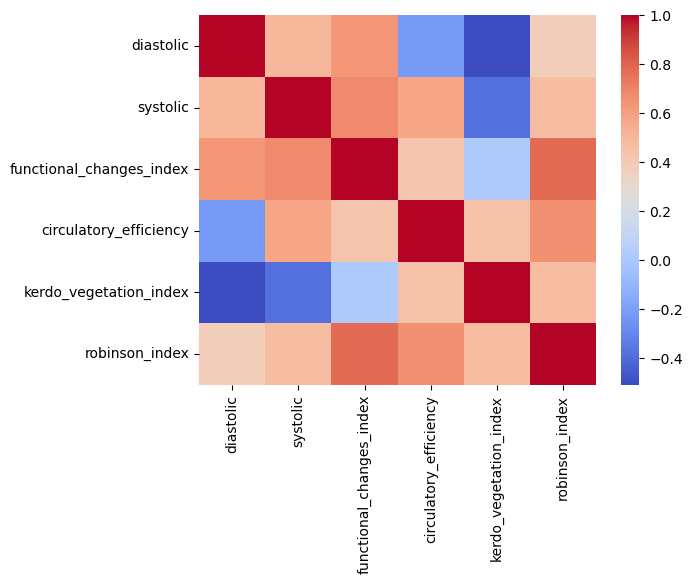

In [627]:
correlation_matrix = df_bp_extended.corr(method='pearson', numeric_only=True)
_ = sns.heatmap(correlation_matrix, cmap='coolwarm')

❗️**Insights**: 

- Most of the insights for this table are addressed inline above, but this is clearly a table, once prepared as we have above, that will augment the analysis of other tables in this dataset subsequent to a join or other operation that marris its data with other measurements.

## Surveys Table

In [628]:
df_svy = dfs['surveys']
table_overview(df_svy)

First 5 rows of the dataframe:


,user_code,scale,created_at,value,text
0,01bad5a519,S_CORONA,2020-04-23,2,Symptoms are characteristic of coronavirus
1,01bad5a519,S_COVID_BLUISH,2020-04-23,1,User isn’t experiencing symptom
2,01bad5a519,S_COVID_BLUISH,2020-04-25,1,User isn’t experiencing symptom
3,01bad5a519,S_COVID_BLUISH,2020-04-27,1,User isn’t experiencing symptom
4,01bad5a519,S_COVID_BLUISH,2020-04-29,1,User isn’t experiencing symptom


Numerical column statistics:


,value
count,2259.000000
mean,2.364763
std,1.554934
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,6.000000


In [629]:
df_svy['scale'].unique()

array(['S_CORONA', 'S_COVID_BLUISH', 'S_COVID_BREATH',
       'S_COVID_CONFUSION', 'S_COVID_COUGH', 'S_COVID_FATIGUE',
       'S_COVID_FEVER', 'S_COVID_OVERALL', 'S_COVID_PAIN',
       'S_COVID_TROUBLE', 'S_HRA_ALC', 'S_HRA_CHOL', 'S_HRA_NECK',
       'S_HRA_SLEEP', 'S_HRA_VIT', 'S_HRA_ANX', 'S_HRA_COLDS',
       'S_HRA_EPILEPSY', 'S_HRA_HEAVY', 'S_HRA_DEP', 'S_HRA_LIVER',
       'S_HRA_BONE', 'S_HRA_HBP', 'S_HRA_JOINT', 'S_HEART', 'S_HEART_3',
       'S_HRA_D', 'S_HRA_PANIC', 'S_HRA_SUGAR', 'S_COVID_SYMPTOMS',
       'S_HRA_ALLERG', 'S_HRA_DBT', 'S_HRA_HEAD', 'S_HRA_LUNG',
       'S_HRA_VARI', 'S_HRA_ANEMIA', 'S_HRA_ASTHMA', 'S_HRA_FIBRO',
       'S_HRA_IRR', 'S_HRA_OVARY', 'S_HRA_LBP', 'S_DIABETES',
       'S_DIAB_REASON1', 'S_DIAB_REASON3', 'S_DIAB_REASON2',
       'S_DIAB_REASON4', 'S_DIAB_REASON5', 'S_HRA_ARR', 'S_HRA_PERPAIN',
       'S_HRA_POST', 'S_HEART_1', 'S_HRA_ENDO', 'S_HRA_HORM', 'S_HEART_4',
       'S_HEART_5', 'S_HRA_OCD', 'S_DIAB_REASON6', 'S_HRA_EDEMA'],
      dtype=o

This is the same hierarchical category schema used in the `scales_description` table. We can repurpose our decoding to more meaningfully examine the distribution of scores... 

In [630]:
df_svy['Subcat1'] = df_svy['scale'].apply(get_subcat1) 
df_svy['Subcat2'] = df_svy['scale'].apply(get_subcat2) 

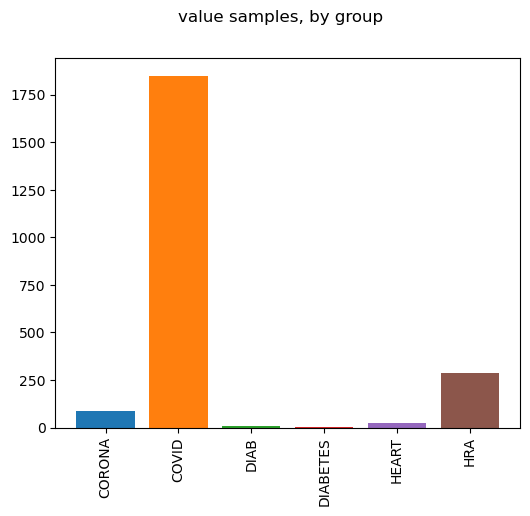

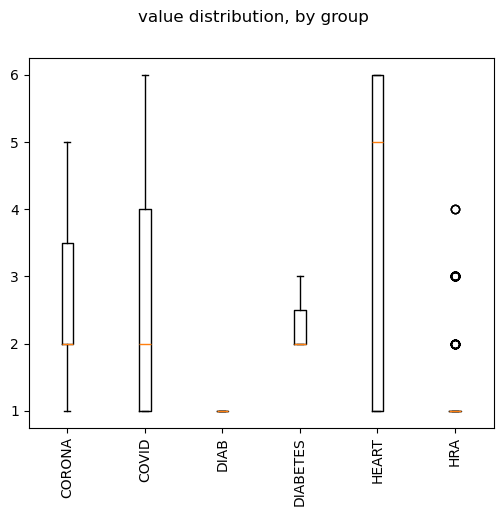

In [631]:
symptom_groups = df_svy.groupby(by='Subcat1')
box_plot_groups(symptom_groups, 'value', width=6)

This plot clarifies the top-level categoricals that are used for the symptom survey, and the range of severities that are reported for each along with their distribution. Interestingly, there seems to be some collision between the `CORONA` column and the `COVID` column, some further inspection and cleaning would be required here before application of this symptom data

In [632]:
df_svy[df_svy['Subcat1'] == 'CORONA']

,user_code,scale,created_at,value,text,Subcat1,Subcat2
0,01bad5a519,S_CORONA,2020-04-23,2,Symptoms are characteristic of coronavirus,CORONA,None
64,05bcfae0a4,S_CORONA,2020-04-20,2,Symptoms are characteristic of coronavirus,CORONA,None
70,0bdfbddb2b,S_CORONA,2020-04-22,2,Symptoms are characteristic of coronavirus,CORONA,None
71,0f2d7af30c,S_CORONA,2020-04-13,2,Symptoms are characteristic of coronavirus,CORONA,None
72,0f2d7af30c,S_CORONA,2020-04-14,4,Symptoms are not characteristic of coronavirus,CORONA,None
...,...,...,...,...,...,...,...
1945,f8b552df37,S_CORONA,2020-05-01,1,User has some of the symptoms associated with ...,CORONA,None
1946,f8da95ff22,S_CORONA,2020-05-17,1,User has some of the symptoms associated with ...,CORONA,None
2135,fde84801d8,S_CORONA,2020-04-23,2,Symptoms are characteristic of coronavirus,CORONA,None
2136,fde84801d8,S_CORONA,2020-04-24,1,User has some of the symptoms associated with ...,CORONA,None


In [633]:
df_svy[df_svy['Subcat1'] == 'COVID']

,user_code,scale,created_at,value,text,Subcat1,Subcat2
1,01bad5a519,S_COVID_BLUISH,2020-04-23,1,User isn’t experiencing symptom,COVID,BLUISH
2,01bad5a519,S_COVID_BLUISH,2020-04-25,1,User isn’t experiencing symptom,COVID,BLUISH
3,01bad5a519,S_COVID_BLUISH,2020-04-27,1,User isn’t experiencing symptom,COVID,BLUISH
4,01bad5a519,S_COVID_BLUISH,2020-04-29,1,User isn’t experiencing symptom,COVID,BLUISH
5,01bad5a519,S_COVID_BLUISH,2020-05-03,1,User isn’t experiencing symptom,COVID,BLUISH
...,...,...,...,...,...,...,...
2254,fe6c1b1349,S_COVID_FATIGUE,2020-05-12,4,Moderate,COVID,FATIGUE
2255,fe6c1b1349,S_COVID_FEVER,2020-05-12,4,Moderate,COVID,FEVER
2256,fe6c1b1349,S_COVID_OVERALL,2020-05-12,3,Mild,COVID,OVERALL
2257,fe6c1b1349,S_COVID_PAIN,2020-05-12,1,User isn’t experiencing symptom,COVID,PAIN


Weirdly, these two reporting surveys coincide temporally. Perhaps the surveys didn't have a consolidated schema at the outset. These `CORONA` symptoms are annoyingly in conflict with the `COVID` symptoms and it's not clear how to reconcile them. These would be candidates for removal if clarification on their interpretation and mapping to the `COVID` scale cannot be obtained. 

We can look at the subcategories of the dominant symptom group here (`COVID`) to get an idea for how 

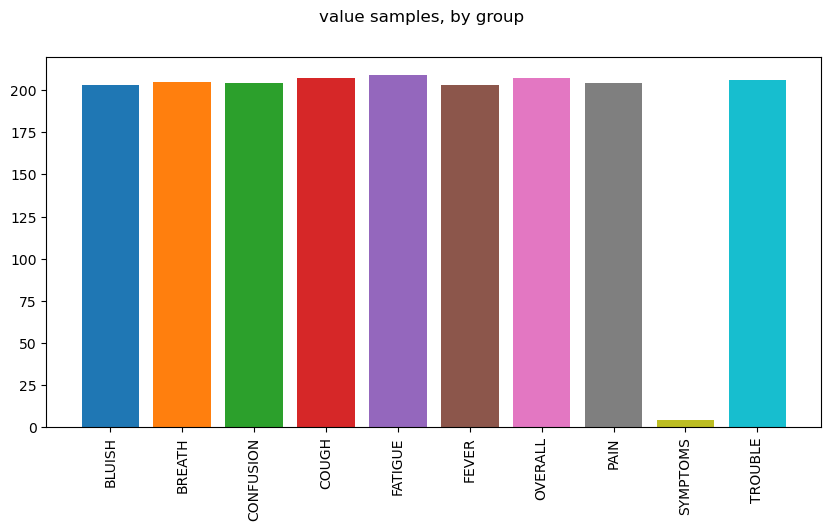

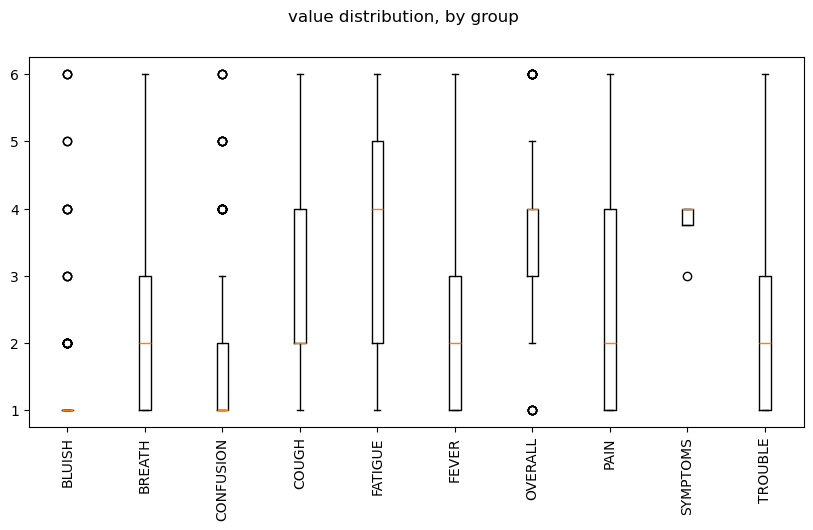

In [634]:
symptom_groups = df_svy[df_svy['Subcat1'] == 'COVID'].groupby(by='Subcat2')
box_plot_groups(symptom_groups, 'value')

❗️ **Insights**: 

- 100% integrity in the rows! :D  Despite that ... this data has issues!
    - Mystery `CORONA` survey category with no subcategory and unclear mapping to `COVID` surveys
    - Existence of possibly erroneous `SYMPTOMS` subcategory of `COVID` surveys - candidate for purging
    - Mystery `SYMPTOMS` subcategory with odd distribution - candidate for purging
- Clearly the COVID survey data dominates in this dataset, with a minority of cardiovascular information provided and vanishly small information on diabetes.
- This table contains categorical data associated with participant surveys that indicate a range of symptoms and the relative severity, in some cases.
- This is another table that must be joined with other data to make use of for a real analysis


## Heart Rate Table

In [635]:
df_hr = dfs['heart_rate']
table_overview(df_hr)

First 5 rows of the dataframe:


,user_code,datetime,heart_rate,is_resting
0,007b8190cf,2020-04-26 04:49:25,70,0
1,01bad5a519,2020-04-23 06:21:03,74,0
2,01bad5a519,2020-04-23 09:46:01,82,0
3,01bad5a519,2020-04-23 14:05:06,90,0
4,01bad5a519,2020-04-24 03:41:18,72,0


Numerical column statistics:


,heart_rate,is_resting
count,523783.000000,523783.000000
mean,90.856626,0.005546
std,25.054152,0.074266
min,10.000000,0.000000
25%,71.000000,0.000000
50%,87.000000,0.000000
75%,108.000000,0.000000
max,232.000000,1.000000


In [636]:
len(df_hr['user_code'].unique())

79

This is a straightforward table and all rows are populated. Unfortunately, there are only 79 users represented of the 185 reported in the `participants` table.  The distribution looks reasonable for human heartrate data. We slice the data by user code to 

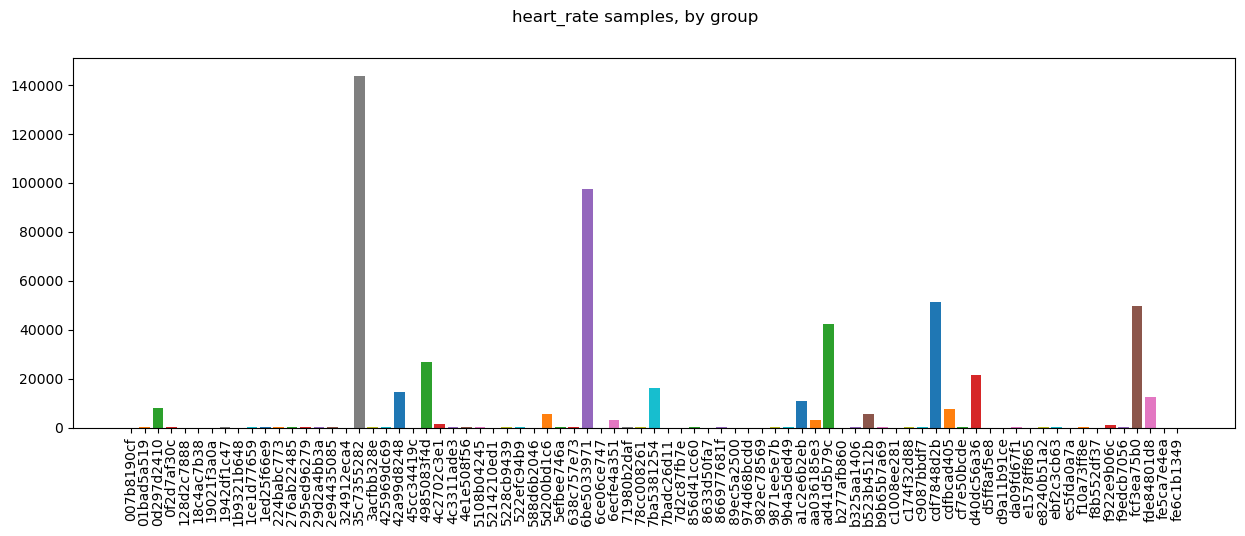

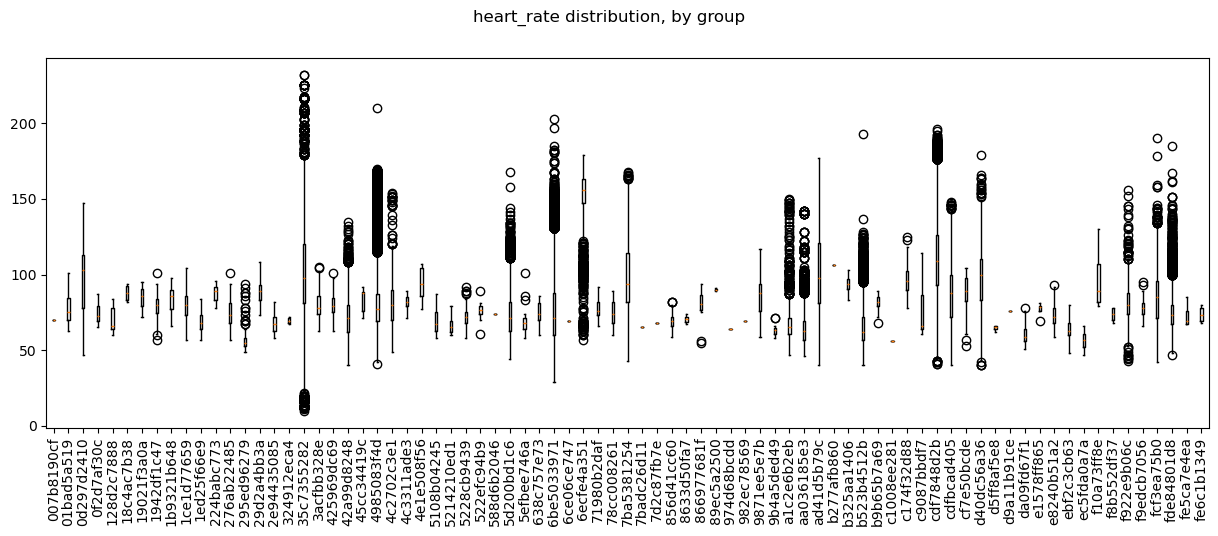

In [637]:
symptom_groups = df_hr.groupby(by='user_code')
box_plot_groups(symptom_groups, 'heart_rate', width=15)

❗️ **Insights**: 

- The fact that we have less than 50% of our participants report on here is a new challenge and undermines later join operations we'd want to conduct with other interesting user reports.
- To compound the problem of low reporting rate here, we have some individuals over-represented by multiple orders of magnitude - a handful of individuals report more readings than all other participants compbined. Strategies for coping with this if we were to attempt to model and predict are not immediately obvious. 

## Weather Table

In [638]:
df_weather = dfs['weather']
table_overview(df_weather) 

First 5 rows of the dataframe:


,user_code,day,avg_temperature_C,atmospheric_pressure,precip_intensity,humidity,clouds
0,013f6d3e5b,2020-05-22,18.0667,1017.6,0.0002,70.0,67.0
1,01bad5a519,2020-01-11,-1.2111,1016.4,0.0002,92.0,6.0
2,01bad5a519,2020-01-30,0.5056,1004.7,0.0009,85.0,100.0
3,01bad5a519,2020-04-02,-0.2444,994.4,0.0025,91.0,87.0
4,01bad5a519,2020-04-12,5.1778,1016.1,0.0000,61.0,91.0


Numerical column statistics:


,avg_temperature_C,atmospheric_pressure,precip_intensity,humidity,clouds
count,1717.000000,1717.000000,1717.000000,1717.000000,1717.000000
mean,11.839221,1014.111639,0.003803,66.376586,56.401734
std,7.769565,8.356792,0.015348,19.339670,35.048917
min,-13.150000,984.300000,0.000000,3.000000,0.000000
25%,6.472200,1009.000000,0.000000,54.000000,24.500000
50%,11.272200,1014.100000,0.000200,68.000000,61.500000
75%,16.663900,1019.566700,0.001700,81.000000,91.000000
max,44.072200,1047.750000,0.256700,100.000000,100.000000


## HRV Measurements Table

In [639]:
df_hrv = dfs['hrv_measurements']
table_overview(df_hrv)

First 5 rows of the dataframe:


,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,...,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep,tags,rr_data
0,007b8190cf,10489a6aea,2020-04-21 21:23:08,morning,75,795.90,0.12,45.802,54.174,15.15,...,508.0,1076.0,267.0,0.472,1851.0,0,-1,NaN,COVID-19; Workout; Sex; Hobby; Studying; Sleep...,"819,1008,831,847,785,778,866,839,801,793,846,8..."
1,007b8190cf,9610d4d4dc,2020-04-26 11:19:25,morning,70,858.00,0.11,32.889,33.022,16.16,...,409.0,310.0,176.0,1.319,895.0,0,0,0.0,NaN,"888,775,811,883,890,894,894,899,893,889,890,83..."
2,013f6d3e5b,f3de056155,2020-05-15 04:14:21,night,83,724.10,0.17,54.811,65.987,17.17,...,432.0,881.0,194.0,0.490,1507.0,-1,-2,NaN,COVID-19; Fast/Diet; Hungry; Tired; Fever; I c...,"694,832,642,801,751,716,737,742,773,760,701,73..."
3,013f6d3e5b,b04489e32f,2020-05-19 03:06:02,night,75,802.64,0.20,72.223,70.039,22.22,...,814.0,1487.0,1719.0,0.547,4020.0,0,0,NaN,NaN,"821,817,771,805,833,788,747,724,792,825,775,75..."
4,01bad5a519,ac52c706c6,2019-12-31 09:07:43,morning,78,768.07,0.10,29.650,21.196,4.04,...,489.0,128.0,96.0,3.820,713.0,0,0,0.0,NaN,"741,740,734,737,740,731,751,747,745,728,747,76..."


Numerical column statistics:


,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep
count,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,1466.000000
mean,73.257935,839.600366,0.184635,52.489218,52.814196,20.615609,0.837465,46.788290,927.038213,1125.041294,578.229892,2.397769,2630.309399,-0.235439,-0.076733,-0.065484
std,12.201088,137.420367,0.107456,29.369506,39.353213,18.588156,0.144769,16.418873,1455.424089,2490.540413,876.679652,5.750760,3912.247496,0.706262,0.655032,0.708656
min,44.000000,477.730000,0.030000,9.515000,6.340000,0.000000,0.475000,12.000000,2.000000,4.000000,1.000000,0.032000,44.000000,-2.000000,-2.000000,-2.000000
25%,65.000000,742.490000,0.110000,32.585000,28.985000,6.060000,0.725000,35.000000,151.000000,158.000000,116.000000,0.399000,620.000000,-1.000000,0.000000,0.000000
50%,72.000000,829.100000,0.160000,46.919000,42.869000,16.160000,0.825000,45.000000,423.000000,380.000000,293.000000,0.862000,1387.000000,0.000000,0.000000,0.000000
75%,81.000000,925.933000,0.220000,64.406000,62.485000,29.290000,0.925000,57.000000,1059.000000,993.000000,693.000000,1.966000,2906.000000,0.000000,0.000000,0.000000
max,125.000000,1346.740000,0.790000,206.631000,310.800000,91.920000,1.325000,98.000000,15522.000000,33490.000000,18468.000000,105.625000,41118.000000,2.000000,2.000000,2.000000


There's a lot of data in the heart-rate variability table, the columns are mostly inscrutable, pasting the metadata from the accompanying datatypes file to aid analysis: 

> Contains data based on heart rate variability (HRV) measurements collected from COVID-19 participants via the Welltory app

|     |               |                                                                                         |                  |
|-----|---------------|-----------------------------------------------------------------------------------------|------------------|
|     | **Column**    | **Description**                                                                         | **Units**        |
| 0   | user\_code    | Unique user ID                                                                          |                  |
| 1   | rr\_code      | Unique measurement ID                                                                   |                  |
| 2   | measurement\_datetime  | Measurement datetime in YYYY-MM-DD hh:mm:ss format                             |                  |
| 3   | time\_of\_day | Time of day: 'evening', 'morning', 'night' or 'day'                                     |                  |
| 4   | bpm           | Heart rate during measurement                                                           | beats per minute |
| 5   | meanrr        | Mean RR — average time between each heartbeat.                                          | milliseconds     |
| 6   | mxdmn         | MxDMn — the difference between highest and lowest cardio interval values.               | seconds          |
| 7   | sdnn          | SDNN — standard deviation of normal heartbeat intervals.                                | milliseconds     |
| 8   | rmssd         | rMSSD — root mean square of successive differences for consecutive intervals.           | milliseconds     |
| 9   | pnn50         | PNN50 — percent of RR-intervals that fall outside a 50 ms range of the average.         | %                |
| 10  | mode          | Moda — the most common cardio interval length in a measurement.                         | milliseconds     |
| 11  | amo           | AMo50 — mode amplitude.                                                                 | %/50milliseconds |
| 12  | lf            | LF — the power of low frequency waves.                                                  | milliseconds²    |
| 13  | hf            | HF — the power of high frequency waves.                                                 | milliseconds²    |
| 14  | vlf           | VLF — power of very low frequency waves.                                                | milliseconds²    |
| 15  | lfhf          | LF/HF — ratio of low to high frequency waves.                                           |                  |
| 16  | total\_power  | Total Power — the total power of HF, LF, and VLF waves generated by the heart.          | milliseconds²    |
| 17  | how\_feel     | Health score — answers to "How do you feel physically?" in the post-measurement survey. |                  |
| 18  | how\_mood     | Mood score — answers to "How is your mood?" in the post-measurement survey.             |                  |
| 19  | how\_sleep    | Sleep score —answers to "How did you sleep?" in the post-measurement survey.            |                  |
| 20  | rr\_data      | Intervals in milliseconds between consecutive heart beats as a comma-separated string   |                  |
| 21  | tags          | Tags assigned by user as a comma-separated string                                       |

In [640]:
len(df_hrv['user_code'].unique())

185

All users are represented here, and there is a high degree of reporting for each column. 

The self-reported tags are unstructued and unsuitable for analysis at a macro level without understanding more about what the context for those are. The sub-50% reporting on sleep data implies it has less utility here, but after review the `how_feel` and `how_mood` should also be lumped into the 'unhelpful' category as there is no reference provided for the survey the respondents were asked to complete and no reference for the scale used. We also toss the unique code for the measurement, no traceability is necessary here. 

In [641]:
df_hrv_core = df_hrv.drop(inplace=False, axis='columns',columns=[
    'rr_code', 
    'rr_data', 
    'how_feel', 
    'how_mood', 
    'how_sleep', 
    'tags'
])

Look at how the participants are represented in the dataset... 

<Axes: >

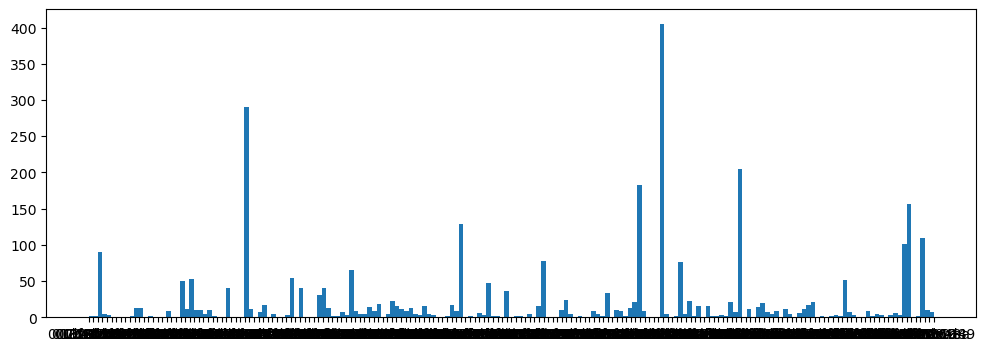

In [642]:
df_hrv_core['user_code'].hist(bins=185, grid=False, figsize=(12,4))

As with the previous table, there is a significant variability in the number of records reported for each individual.

In [643]:
df_hrv_core.head()

,user_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power
0,007b8190cf,2020-04-21 21:23:08,morning,75,795.90,0.12,45.802,54.174,15.15,0.775,53.0,508.0,1076.0,267.0,0.472,1851.0
1,007b8190cf,2020-04-26 11:19:25,morning,70,858.00,0.11,32.889,33.022,16.16,0.875,54.0,409.0,310.0,176.0,1.319,895.0
2,013f6d3e5b,2020-05-15 04:14:21,night,83,724.10,0.17,54.811,65.987,17.17,0.725,46.0,432.0,881.0,194.0,0.490,1507.0
3,013f6d3e5b,2020-05-19 03:06:02,night,75,802.64,0.20,72.223,70.039,22.22,0.825,43.0,814.0,1487.0,1719.0,0.547,4020.0
4,01bad5a519,2019-12-31 09:07:43,morning,78,768.07,0.10,29.650,21.196,4.04,0.775,56.0,489.0,128.0,96.0,3.820,713.0


### Clustering

This are a lot of dimensions to this data, which are pretty hard to quickly draw any conclusions about. Let's try to cluster the data and see if any intuitive groups emerge. 

Replace the time of day, and user codes with a real number representation to simplify clustering, dimensionality reduction

In [644]:
day_strings = df_hrv_core['time_of_day'].unique()

In [645]:
def encode_day(day): 
    for i, d in enumerate(day_strings): 
        if d == day: 
            return i

df_hrv_core['encoded_day'] = df_hrv_core['time_of_day'].apply(encode_day) 

In [646]:
user_strings = df_hrv_core['user_code'].unique()

In [647]:
def encode_user(user): 
    for i, u in enumerate(user_strings): 
        if u == user: 
            return i 

df_hrv_core['encoded_user'] = df_hrv_core['user_code'].apply(encode_user)

Now replace the timestamp with a real number representation... 

In [648]:
def encode_timestamp(time): 
    return pd.to_datetime(time).value

df_hrv_core['encoded_time'] = df_hrv_core['measurement_datetime'].apply(encode_timestamp)

... and drop the original columns. 

In [649]:
df_hrv_core.drop(inplace=True, axis='columns',columns=[
    'user_code',
    'measurement_datetime', 
    'time_of_day'
])

In [650]:
df_hrv_core.head()

,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power,encoded_day,encoded_user,encoded_time
0,75,795.90,0.12,45.802,54.174,15.15,0.775,53.0,508.0,1076.0,267.0,0.472,1851.0,0,0,1587504188000000000
1,70,858.00,0.11,32.889,33.022,16.16,0.875,54.0,409.0,310.0,176.0,1.319,895.0,0,0,1587899965000000000
2,83,724.10,0.17,54.811,65.987,17.17,0.725,46.0,432.0,881.0,194.0,0.490,1507.0,1,1,1589516061000000000
3,75,802.64,0.20,72.223,70.039,22.22,0.825,43.0,814.0,1487.0,1719.0,0.547,4020.0,1,1,1589857562000000000
4,78,768.07,0.10,29.650,21.196,4.04,0.775,56.0,489.0,128.0,96.0,3.820,713.0,0,2,1577783263000000000


... and normalize everythign, column-wise. This should probably be a global normalization but ... :: shrug emoji :: 

In [651]:
def normalize_column(df, column): 
    max = df[column].max()
    min = df[column].min()

    def normalize_value(value): 
        return (value - min) / (max - min) 

    df[column] = df[column].apply(normalize_value) 

In [652]:
for col in df_hrv_core.columns: 
    normalize_column(df_hrv_core, col)

In [653]:
df_hrv_core.head()

,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power,encoded_day,encoded_user,encoded_time
0,0.382716,0.366129,0.118421,0.184090,0.157111,0.164817,0.352941,0.476744,0.032603,0.032013,0.014404,0.004167,0.043994,0.000000,0.000000,0.657799
1,0.320988,0.437590,0.105263,0.118580,0.087637,0.175805,0.470588,0.488372,0.026224,0.009138,0.009476,0.012188,0.020719,0.000000,0.000000,0.684551
2,0.481481,0.283507,0.184211,0.229794,0.195911,0.186793,0.294118,0.395349,0.027706,0.026190,0.010451,0.004337,0.035619,0.333333,0.005435,0.793789
3,0.382716,0.373885,0.223684,0.318127,0.209220,0.241732,0.411765,0.360465,0.052320,0.044287,0.093031,0.004877,0.096801,0.333333,0.005435,0.816872
4,0.419753,0.334104,0.092105,0.102148,0.048795,0.043951,0.352941,0.511628,0.031379,0.003703,0.005144,0.035874,0.016288,0.000000,0.010870,0.000727


Now that we have a numerical representation of the time of day, we can look at correlations more readily. 

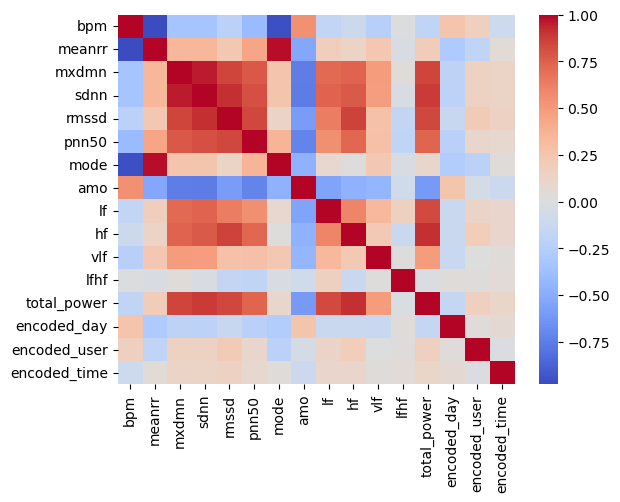

In [654]:
correlation_matrix = df_hrv_core.corr(method='pearson', numeric_only=True)
_ = sns.heatmap(correlation_matrix, cmap='coolwarm')

There are some weak inverse correlations between the encoded time of day (`encoded_day`) and heart rate. Let's do a simple plot, to see if there's visual evidence of a correlation. 

<Axes: xlabel='bpm', ylabel='encoded_day'>

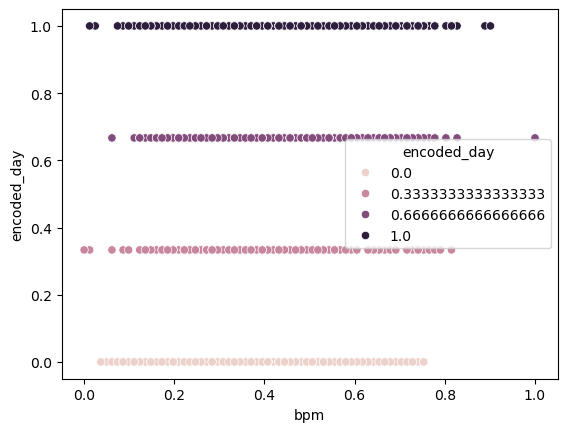

In [655]:
sns.scatterplot(df_hrv_core, x='bpm', y='encoded_day', hue=df_hrv_core['encoded_day'])

It looks **faintl** like there's a possible relationship here with the time of day and the measured heart rate. The higher bpm measurements are only reported late in the day (1.0 on the chart above). But there's obviously lots of other things happening in the background. Let's let an algorithm try to find a global grouping in this data setclusting with K-means, using an arbitrary number of 4 classes on our (very weak) hunch that the four times of day reported here might be factors for measured heart rate. 

Note K-means syntax in consultation with [sklearn docs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and this [datacamp article](https://www.datacamp.com/tutorial/k-means-clustering-python). 

In [656]:
from sklearn.cluster import KMeans

In [657]:
kmeans = KMeans(n_clusters = 4, random_state=0, n_init="auto")
kmeans.fit(df_hrv_core)

KMeans(n_clusters=4, random_state=0)

In [658]:
len(kmeans.cluster_centers_)

4

... and now we have labels for all of our points, each indicating the cluster that the row is associated with, and the centroids associated with each. 

In [659]:
df_hrv_core['cluster_4']=kmeans.labels_

In [660]:
df_hrv_core.head()

,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power,encoded_day,encoded_user,encoded_time,cluster_4
0,0.382716,0.366129,0.118421,0.184090,0.157111,0.164817,0.352941,0.476744,0.032603,0.032013,0.014404,0.004167,0.043994,0.000000,0.000000,0.657799,0
1,0.320988,0.437590,0.105263,0.118580,0.087637,0.175805,0.470588,0.488372,0.026224,0.009138,0.009476,0.012188,0.020719,0.000000,0.000000,0.684551,0
2,0.481481,0.283507,0.184211,0.229794,0.195911,0.186793,0.294118,0.395349,0.027706,0.026190,0.010451,0.004337,0.035619,0.333333,0.005435,0.793789,0
3,0.382716,0.373885,0.223684,0.318127,0.209220,0.241732,0.411765,0.360465,0.052320,0.044287,0.093031,0.004877,0.096801,0.333333,0.005435,0.816872,0
4,0.419753,0.334104,0.092105,0.102148,0.048795,0.043951,0.352941,0.511628,0.031379,0.003703,0.005144,0.035874,0.016288,0.000000,0.010870,0.000727,0


<Axes: xlabel='bpm', ylabel='encoded_day'>

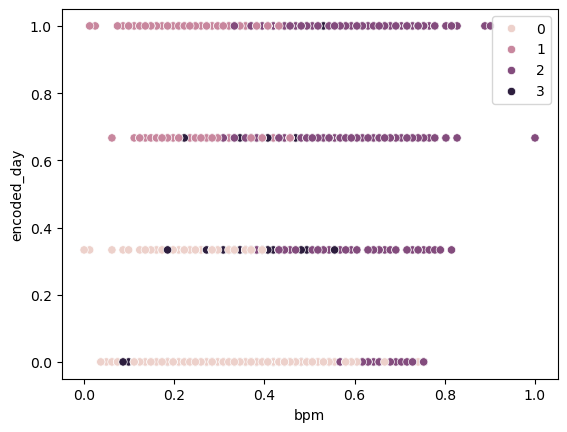

In [661]:
sns.scatterplot(df_hrv_core, x='bpm', y='encoded_day', hue=kmeans.labels_)

The clusters that K-means found clearly span the time of day the measurements were taken (`encoded_day`), but interestingly clusters 0 and 2 do split across the earlier times of day, whereas clusters 1 and 3 are dominant in the later hours. 

### Dimensionality Reduction

Now let's reduce the dimensionality and see if anything jumps out... 

Note: referenced DataCamp tutorial on Python-based PCA [here](https://www.datacamp.com/tutorial/principal-component-analysis-in-python). 

In [662]:
from sklearn.decomposition import PCA
pca_hrv = PCA(n_components=4)
pc_hrv = pca_hrv.fit_transform(df_hrv_core) 

In [663]:
pca_df = pd.DataFrame(data = pc_hrv, columns=['pc1', 'pc2', 'pc3', 'pc4'])

<Axes: >

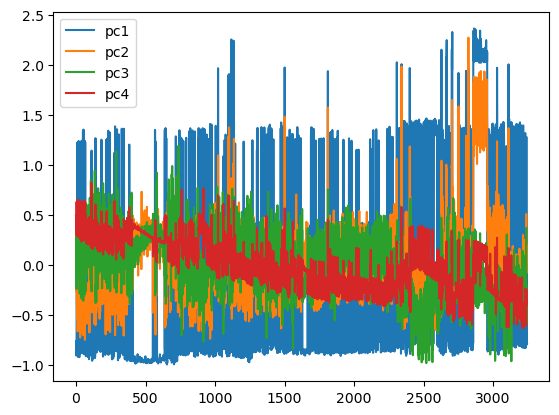

In [664]:
pca_df.plot()

Further analysis required here to make sense of the groupings that PCA has yielded. We really need an interactive plot to explore the metadata associated with each point, but that's probably beyond the scope here. 

❗️ **Insights**

- On the surface, this appears to be the most consistent and intact table provided. This is probably why this dataset is called out in Github as the 'hrv-covid19' dataset. I.e. the HRV data may be the primary value this dataset contributed to COVID-19 research and would explain why a number of reputable groups have investigated its patterns.
- There are some clear-cut correlations in the heart-rate variability as revealed by a simple correlation matrix
- While this data is rich, without inclusion of other risk factors and symptoms, it's analysis is of limited utility

## Sleep Table

In [665]:
df_sleep = dfs['sleep']
table_overview(df_sleep)

First 5 rows of the dataframe:


,user_code,day,sleep_begin,sleep_end,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
0,0d297d2410,2019-12-31,2019-12-31 07:50:32,2019-12-31 08:45:22,3290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0d297d2410,2020-01-01,2020-01-01 04:13:41,2020-01-01 09:45:02,19881.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0d297d2410,2020-01-02,2020-01-02 02:14:52,2020-01-02 08:06:00,21068.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0d297d2410,2020-01-03,2020-01-03 00:10:00,2020-01-03 08:45:10,30910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0d297d2410,2020-01-04,2020-01-04 01:27:25,2020-01-04 08:52:20,26695.0,NaN,NaN,21480.0,NaN,55.0,95.0,72.5


Numerical column statistics:


,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
count,425.000000,9.000000,7.000000,27.000000,14.000000,15.000000,15.000000,15.000000
mean,25699.731765,2733.333333,6518.571429,14514.740741,4280.285714,60.533333,89.866667,68.880733
std,7773.805470,671.900290,2081.613385,8078.126290,2089.766547,12.844491,10.541528,10.947268
min,930.000000,1740.000000,2820.000000,300.000000,480.000000,52.000000,62.000000,59.444000
25%,21857.000000,2460.000000,5730.000000,7995.000000,2797.500000,54.500000,85.000000,63.393000
50%,26041.000000,2490.000000,6240.000000,17340.000000,4230.000000,58.000000,93.000000,65.857000
75%,30600.000000,2790.000000,8190.000000,20340.000000,5550.000000,60.000000,94.500000,70.250000
max,47460.000000,4200.000000,8730.000000,23100.000000,7934.000000,105.000000,105.000000,105.000000


# Macro-level Analysis

Here we take assemble a larger perspective on the dataset and test a few hypotheses about relationships latent in the data. 

## H1: There is a relationship between HRV and COVID-19 infection

Here we look at the heart rate data surrounding the infection event and expect some difference to be evident. Null hypothesis is that there is no relationship. 

Check the distribution of the measurement timing... 

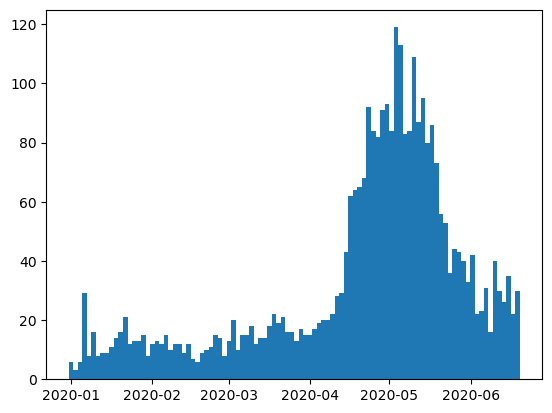

In [666]:
df_hrv['measurement_datetime'] = pd.to_datetime(df_hrv['measurement_datetime'])
_ = mpl.pyplot.hist(df_hrv['measurement_datetime'].unique(), bins=100)

Looks promising, measurements before and after the primary infection spike in the symptoms table (see way above for this plot). 

Clean the sparse columns for this table... and create a new DF view, leaving the measurement code to later join on. 

In [667]:
df_hrv_h1 = df_hrv_core = df_hrv.drop(inplace=False, axis='columns',columns=[ 
    'rr_data', 
    'how_feel', 
    'how_mood', 
    'how_sleep', 
    'tags'
])

Now narrow our analysis to those users who have HRV data reported both prior and subsequent to infection by jointly inspecting the participants and hrv tables. 

In [668]:
df_p.head(1)

,user_code,gender,age_range,city,country,height,weight,symptoms_onset,bmi
1,013f6d3e5b,f,18-24,São Paulo,Brazil,174.0,77.3,2020-05-15,25.531774


In [669]:
df_hrv_h1.head(1) 

,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power
0,007b8190cf,10489a6aea,2020-04-21 21:23:08,morning,75,795.9,0.12,45.802,54.174,15.15,0.775,53.0,508.0,1076.0,267.0,0.472,1851.0


In [670]:
def is_after_onset(time, user): 
    """
    Helper function to report whether a given time is post-symptom onset. 
    """
    
    # Get a view on the participant DF for the associated user
    df_user = df_p[df_p['user_code'] == user]
    
    for onset_time in df_user['symptoms_onset']: 
        if time >= onset_time: 
            return True
    
    return False

df_hrv_h1['post_onset'] = df_hrv_h1.apply(lambda x: is_after_onset(x.measurement_datetime, x.user_code), axis=1) 

In [671]:
df_pre = df_hrv_h1[df_hrv_h1['post_onset'] == False]
df_post = df_hrv_h1[df_hrv_h1['post_onset'] == True]

Find the users that have reporting prior to and following onset... 

In [672]:
pre_onset_users = df_pre['user_code'].unique()
post_onset_users = df_post['user_code'].unique()
h1_users = set(pre_onset_users) & set(post_onset_users)

In [673]:
def filter_users(user): 
    return True if user in h1_users else False
    
df_hrv_h1 = df_hrv_h1[df_hrv_h1['user_code'].apply(filter_users)]

In [674]:
df_hrv_h1.head()

,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power,post_onset
4,01bad5a519,ac52c706c6,2019-12-31 09:07:43,morning,78,768.07,0.10,29.650,21.196,4.04,0.775,56.0,489.0,128.0,96.0,3.820,713.0,False
5,01bad5a519,7c39e19d73,2020-01-11 14:52:39,day,69,859.91,0.13,31.306,20.753,3.03,0.875,52.0,301.0,66.0,675.0,4.561,1042.0,False
6,01bad5a519,2ccb710069,2020-01-30 17:55:54,day,73,823.04,0.12,33.033,22.525,1.01,0.825,56.0,312.0,146.0,160.0,2.137,618.0,False
7,01bad5a519,d1cb7d3325,2020-04-02 12:07:09,day,73,814.16,0.08,23.071,24.118,5.05,0.825,76.0,93.0,135.0,129.0,0.689,357.0,False
8,01bad5a519,e146d669b6,2020-04-12 15:00:58,day,84,714.17,0.08,23.613,28.472,9.09,0.725,80.0,41.0,61.0,59.0,0.672,161.0,True


We now have a DF consisting exclusively of HRV data where the users have both pre and post infection measurements. Update our views. 

In [675]:
df_pre = df_hrv_h1[df_hrv_h1['post_onset'] == False]
df_post = df_hrv_h1[df_hrv_h1['post_onset'] == True]

And look at the statistics around the standard deviation measurement, which is a measurement of the heart rate variability observed during the window of measurement. We would expect the post-infection group to have a higher average SD here. 

In [676]:
df_pre['sdnn'].describe()

count    697.000000
mean      48.926380
std       25.054696
min        9.515000
25%       27.644000
50%       47.376000
75%       64.841000
max      206.631000
Name: sdnn, dtype: float64

In [677]:
df_post['sdnn'].describe()

count    792.000000
mean      49.145817
std       21.142616
min        9.811000
25%       33.771500
50%       46.816500
75%       61.472500
max      129.913000
Name: sdnn, dtype: float64

The average standard deviation of the measured heartrate for all users pre-infection was 48.9, while the post-infection standard deviation averaged just slightly higher at 49.1. This is a pretty naive analysis, but there's no glaring evidence for increased HRV post infection. Let's pick the users with the most measurements and look at a few examples. 

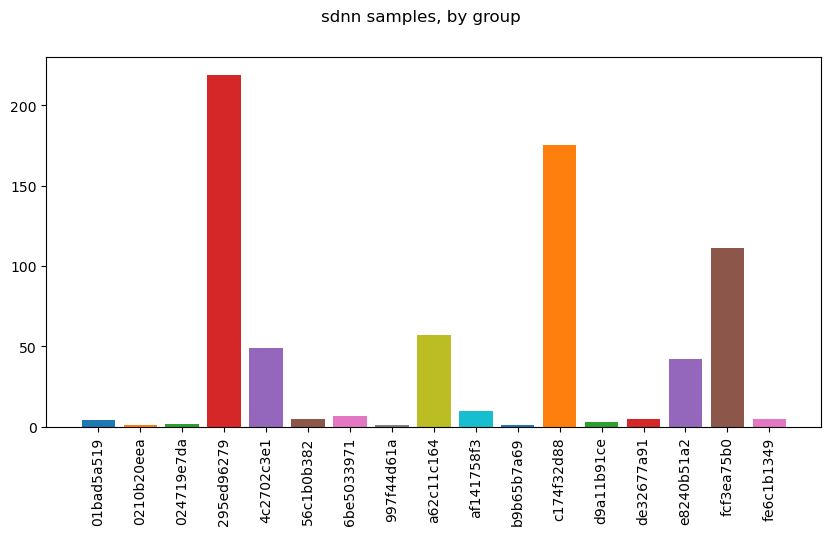

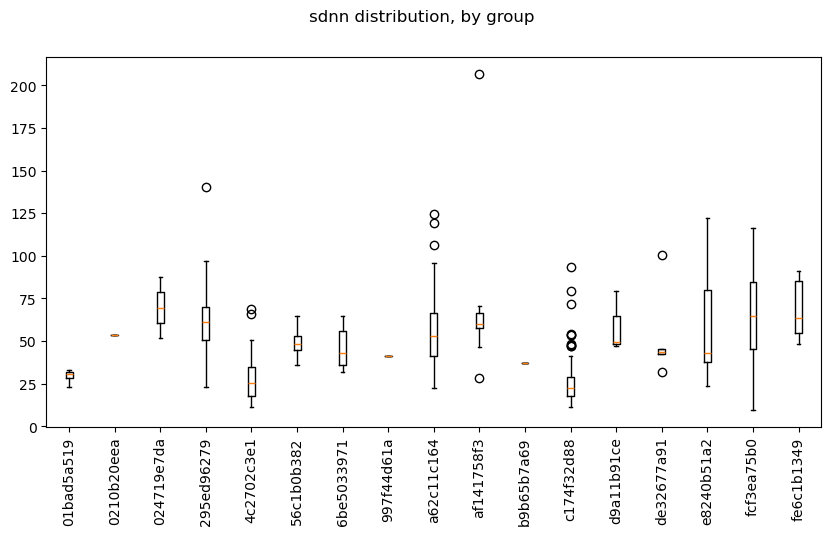

In [678]:
pre_user_groups = df_pre.groupby(by='user_code')
box_plot_groups(pre_user_groups, 'sdnn')

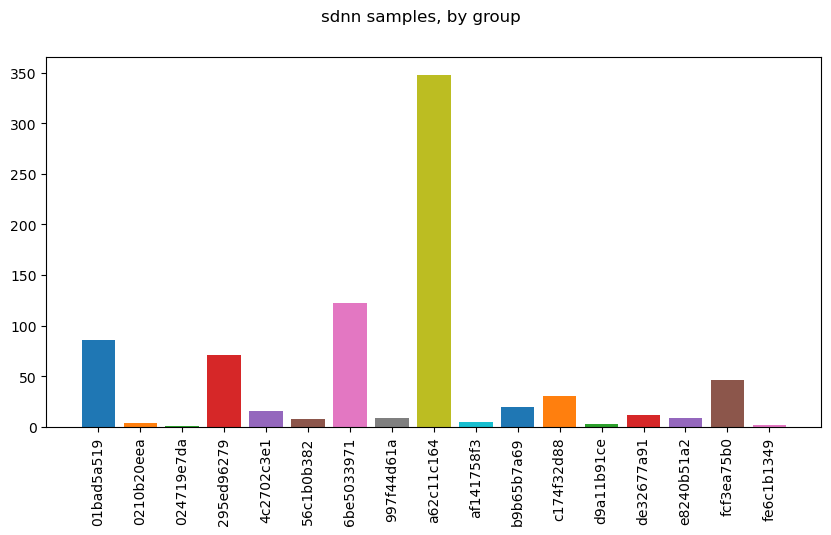

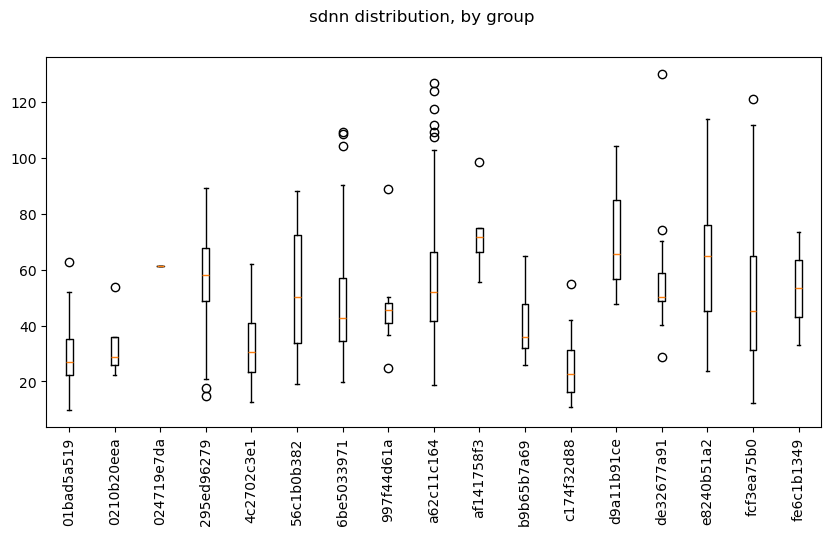

In [679]:
post_user_groups = df_post.groupby(by='user_code')
box_plot_groups(post_user_groups, 'sdnn')

In [680]:
df_pre_fcf3ea75b0 = df_pre[df_pre['user_code']=='fcf3ea75b0']
df_post_fcf3ea75b0 = df_post[df_post['user_code']=='fcf3ea75b0']

In [681]:
df_pre_fcf3ea75b0['sdnn'].mean()

64.15145045045044

In [682]:
df_post_fcf3ea75b0['sdnn'].mean()

49.08093478260869

For this user, the variability actually declined markedly. :: shrug emoji :: 

Finally, let's look at the delta between the two correlation matrices to understand what correlations changed between pre and post infection. 

In [683]:
pre_correlation = df_pre.corr(method='pearson', numeric_only=True)
post_correlation = df_post.corr(method='pearson', numeric_only=True)

In [684]:
diff = pre_correlation - post_correlation

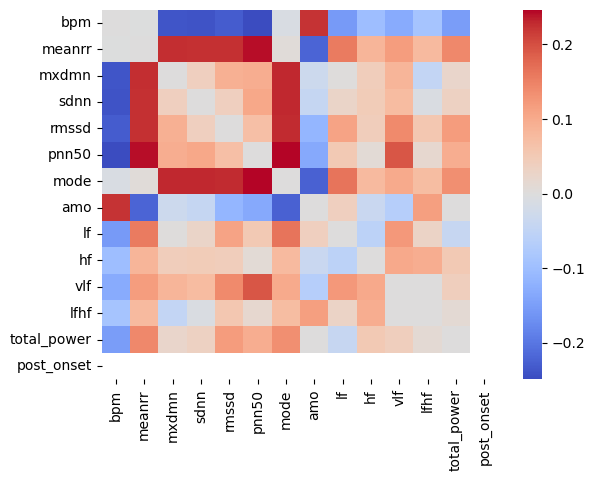

In [685]:
_ = sns.heatmap(diff, cmap='coolwarm')

Interestingly, there were considerable differences in  
- correlation between average heart rate (BPM) and the some of the core variability measurements like standard deviation (sdnn) and pnn50 (percent of intervals that are outside a 50ms range of average)
- correlation between mean heart rate those same metrics

This would perhaps be the place to start a real investigation, attempting ot understand why there was non-trivial changes in these correlations could yield insights into the underlying cardiovascular intersection with COVID. 